# Linear Discriminant Analysis (LDA)

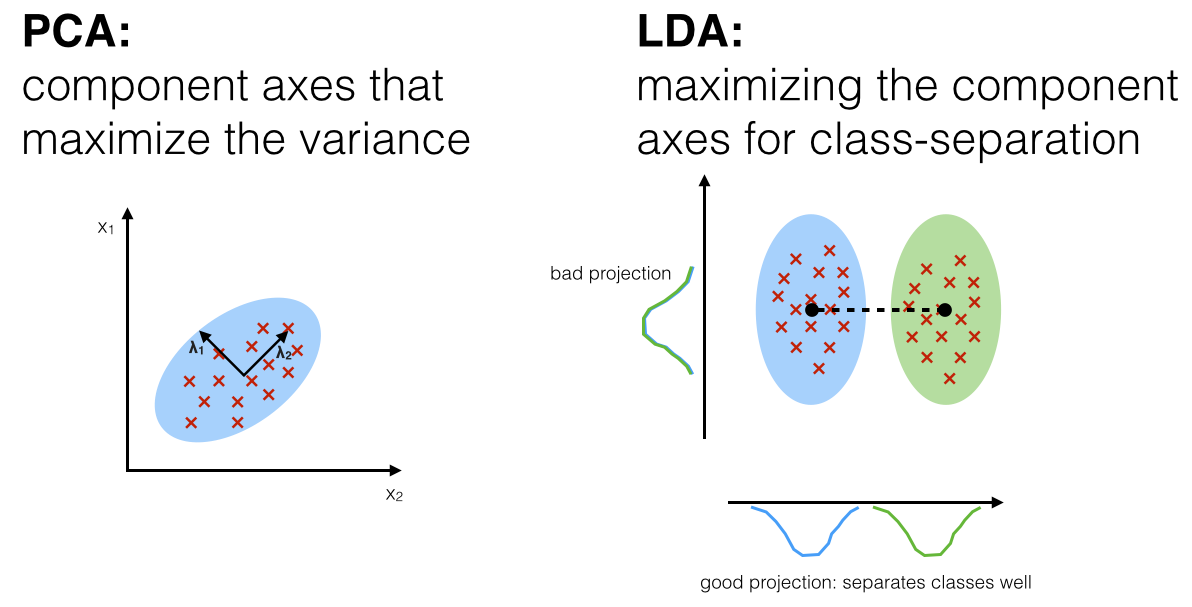

**Linear Discriminant Analysis (LDA)** is an algorithm that aims to find a **lower-dimensional space** that **maximizes the separation between different classes** while keeping **most information related to discrimination**. Here are the **formal steps** of achieving this goal:
1.   First, have a dataset with classes and features.
2.   Then, compute the **mean vector for each class for each feature**.
3.   Compute **Within-Class Scatter Matrix** ($S_w$) by calculate the **covariance matrix for each class** and **sum them up**.
4.   Then, compute **Between-Class Scatter Matrix** ($S_b$) by $Σ^N_{n=1}(μ_n - \mu)(μ_n - \mu)^T$ where μ is the **average of all class means**.
5.   After that, find the **eigenvectors and eigenvalues** of matrix $S^{-1}_wS_b$ and **sort eigenvectors based on its corresponding eigenvalues**.
6.   After sorting, the **top eigenvectors will be the line that spans the first dimension that captures the most 'discrimination'** in the variables (which means that **it keeps the largest separation** in the original variables and this is **demonstrated by its eigenvalues**).
7.   Keep the **most top n eigenvectors** depending on **how many dimensions you want to keep** (it can be 2 which is easier to visualize), then simply maps all the data points onto each of the new dimensions and the resulted points from all dimensions will be the final result.



***Similiar to PCA, the above method is reasonable but not clear to understand, here is a more intuitive explaination.***

Say we have **only 2 classes and n variables with dimension n** and the **goal is to map this dimension to a space with a dimension m that is less than n**.
1.   First, for **LDA**, we want to **maximize the difference between the means of each class while keeping the variance in each class to be small**. Simply, we will have the equation form: $max \frac{(μ_1-μ_2)^2}{s^2_1+s^2_2}$. ***Note that we have $μ_1-μ_2$ since it is only 2 classes, with more classes, it will be $Σ(μ_i-μ)^2$ where $μ$ is the average of all means.***
2.   For the top part, we will have $(μ_1-μ_2)^2=(v^Tm_1-v^Tm_2)^2=(v^T(m_1-m_2))^2=v^T(m_1-m_2)(m_1-m_2)^Tv=v^TS_bv$
3.   $s^2_j = Σ(v^Tx_i-v^Tm_j)^2 = Σv^T(x_i-m_j)(x_i-m_j)^Tv = v^TS_jv$
4.   Note that $S_j$ is the **covariance** of that class. Then $s^2_1+s^2_2 = v^TS_1v + v^TS_2v = v^T(S_1+S_2)v=v^TS_wv$
5.   After above computation, our equation will be $max\frac{v^TS_bv}{v^TS_wv}$ with constraint that $v^Tv=1$.
7.   Looks familiar right? Exactly similar thing we did in **PCA**. In this case, we will have the equation $S^{-1}_wS_bv=λv$.
8.   Similarly, the **maximum of problem will given by the largest eigenvector** of this equation.
9.   **Similarly, to map original space to a m dimensional space, we just need to find the top m eigenvectors with corresponding top m eigenvalues**.






***Note: LDR is a supervised algorithm as it uses labels of classes and it assumes that data is linearly separable.***

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying LDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
#Note: LDA is a supervised algorithm, so we also need y_train
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Training the Logistic Regression model on the Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Making the Confusion Matrix

1.0

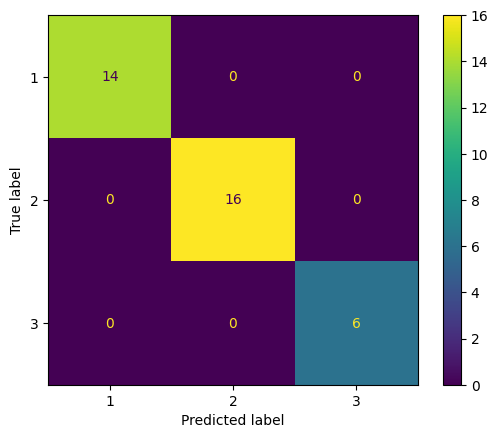

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3]).plot()
accuracy_score(y_test, y_pred)

## Visualising the Training set results

<ipython-input-10-72e3cb40010d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)


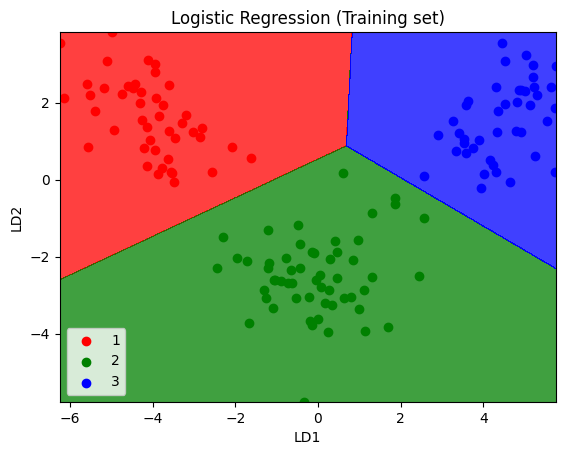

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min(), stop=X_set[:, 0].max(), step=0.01),
                     np.arange(start=X_set[:, 1].min(), stop=X_set[:, 1].max(), step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-11-e6b6b2583d4a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green', 'blue'))(i), label=j)


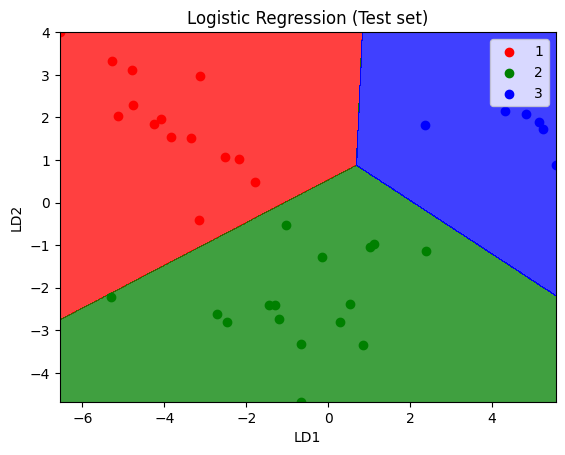

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min(), stop=X_set[:, 0].max(), step=0.01),
                     np.arange(start=X_set[:, 1].min(), stop=X_set[:, 1].max(), step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()